## Section 4a. Profiling

In software engineering, profiling ("program profiling", "software profiling") is a form of dynamic program analysis that measures, for example, the space (memory) or time complexity of a program, the usage of particular instructions, or the frequency and duration of function calls. Most commonly, profiling information serves to aid program optimization, and more specifically, performance engineering.

source: Wikipedia

## Section 4a.1 Profiler types

In this section of the lab, we will be working in particular with profilers in the Python language. In general, there are at least two types of profilers in python. They are deterministic and statistical profiling. The differences are as follows:

**Deterministic profiling**

Deterministic profilers monitors all function calls, function returns and exception events. Timings are made for every single one of this events.

**Statistical profiling**

Instead of tracking every event (e.g. call to every function), statistical profilers interrupts the application periodically and samples the effective instruction pointer. These are analyzed next to estimate where the application is spending its time in.

*source: https://docs.python.org/2.0/lib/Deterministic_Profiling.html*

Typically deterministic profilers cause huge overheads as every single event is instrumented. However naturally it provides high granularity and accuracy of the data generated.

In this lab, we will first look at deterministric profiler (cProfile) before a statistical one.

## Section 4a.2 Introduction to cProfile (deterministic)

Let's first look at a simple iterative example. Assume that we have 5 functions, and they are related to each other in the following manner:

```
func_a -> func_b (1000 times) -> func_e (17000 times)
       -> func_c (1000 times) -> func_e (15000 times)
```

23.801157817000004


If we were to run the code above, the time taken is within the range of 2 to 3 seconds. Let's now try to profile the code with the cProfile module. Using the magic %% operator, we are able to write the cell contents to the file in our google cloud server.

Writing multiple_calls.py


And now the functions can be profiled with the following line:

         32002004 function calls in 7.366 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1000    2.343    0.002    3.440    0.003 multiple_calls.py:11(func_c)
 32000000    2.345    0.000    2.345    0.000 multiple_calls.py:15(func_e)
        1    0.000    0.000    7.366    7.366 multiple_calls.py:2(<module>)
        1    0.002    0.002    7.366    7.366 multiple_calls.py:2(func_a)
     1000    2.677    0.003    3.925    0.004 multiple_calls.py:7(func_b)
        1    0.000    0.000    7.366    7.366 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




We can sort it with the -s option.

         32002004 function calls in 8.964 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1000    3.291    0.003    4.727    0.005 multiple_calls.py:7(func_b)
     1000    2.964    0.003    4.234    0.004 multiple_calls.py:11(func_c)
 32000000    2.707    0.000    2.707    0.000 multiple_calls.py:15(func_e)
        1    0.002    0.002    8.964    8.964 multiple_calls.py:2(func_a)
        1    0.000    0.000    8.964    8.964 {built-in method builtins.exec}
        1    0.000    0.000    8.964    8.964 multiple_calls.py:2(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




Notice that the execution time increases almost three times. But here you can see clearly the various calls being made, total time being spent as well as the cummulative time. The column headings are:

**ncalls**
Total number of calls.

**tottime**
Total time spent in the given function (and excluding time made in calls to sub-functions).

**percall**
tottime divided by ncalls

**cumtime**
Cumulative time spent in this and all subfunctions (from invocation till exit).

**percall**
cumtime divided by primitive calls

**filename:lineno(function)**
Line number of the function

*Additional options can be seen here: https://docs.python.org/3.7/library/profile.html*


Let's try to visualize these calls. We first install the necessary packages:

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Next we generate the output files in the following manner. Notice that the files output.png and output.pstats are generated on the folder structure on the left.

multiple_calls.py  output.png  output.pstats  sample_data  test


The following line displays the output image on your notebook. You can see that it corresponds to the original call tree up above.

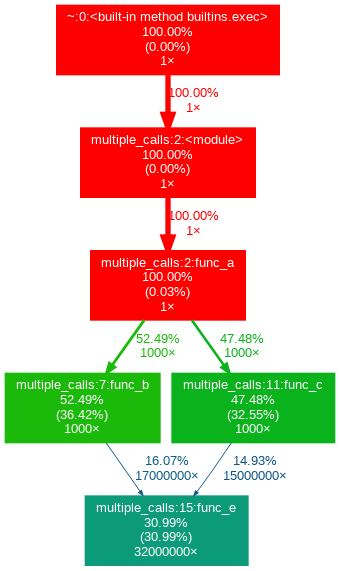

Now let's try to carry out this analysis on our favourite fibonacci number recursive function, and see if there is a way to optimize it. First we find out what the execution time is when n is equals to 10.

5702887 11.770346236999984


Let's try to do the profiling here from a module. For this recursive function, it's clearer to use the cProfile as a module rather than from the command line.

5702887 13.199637007999996
         18454984 function calls (55 primitive calls) in 13.200 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
18454929/1   13.199    0.000   13.199   13.199 <ipython-input-12-99ef63a1fc6c>:8(fib)
        1    0.000    0.000   13.200   13.200 <string>:1(<module>)
        3    0.000    0.000    0.001    0.000 iostream.py:197(schedule)
        2    0.000    0.000    0.000    0.000 iostream.py:310(_is_master_process)
        2    0.000    0.000    0.000    0.000 iostream.py:323(_schedule_flush)
        2    0.000    0.000    0.001    0.000 iostream.py:386(write)
        3    0.000    0.000    0.000    0.000 iostream.py:93(_event_pipe)
        2    0.000    0.000    0.000    0.000 pydevd.py:1058(get_cache_file_type)
        1    0.000    0.000    0.000    0.000 pydevd.py:937(_internal_get_file_type)
      3/2    0.000    0.000    0.000    0.000 pydevd.py:983(get_file_type)
        1    0.000    0.000

Notice that the execution time has almost doubled with such a small example. You can also tell that the recursive call occurs for more than 18454929 times, although the number of primitive calls are just 40. Hence you can deduce that there is room for improvement here. Let's try to carry out some memoization to reduce the number of function calls.

We do that by first creating a dictionary and storing the outputs there. If the output is present, we will use the value in the dictionary. Else we will carry out the function call.

5702887
None 0.0013217479999809711
         161 function calls (126 primitive calls) in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.001    0.001 <ipython-input-13-f2e44615d0c0>:29(fib_driver)
     35/1    0.000    0.000    0.000    0.000 <ipython-input-13-f2e44615d0c0>:8(fib)
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        5    0.000    0.000    0.001    0.000 iostream.py:197(schedule)
        4    0.000    0.000    0.000    0.000 iostream.py:310(_is_master_process)
        4    0.000    0.000    0.000    0.000 iostream.py:323(_schedule_flush)
        4    0.000    0.000    0.001    0.000 iostream.py:386(write)
        5    0.000    0.000    0.000    0.000 iostream.py:93(_event_pipe)
        3    0.000    0.000    0.000    0.000 pydevd.py:1058(get_cache_file_type)
        2    0.000    0.000    0.000    0.000 pydevd.py:937(_internal_get_file_type)
      4

You would notice that the number of iterative calls have decreased dramatically to just 35, which in fact makes this recursive function O(n), the same as the iterative version of our fibonacci number generator.

5702887 0.0005143159999931868
         56 function calls (55 primitive calls) in 0.002 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <ipython-input-14-063f6bd518ce>:8(fib_iter)
        1    0.000    0.000    0.002    0.002 <string>:1(<module>)
        3    0.000    0.000    0.002    0.001 iostream.py:197(schedule)
        2    0.000    0.000    0.000    0.000 iostream.py:310(_is_master_process)
        2    0.000    0.000    0.000    0.000 iostream.py:323(_schedule_flush)
        2    0.000    0.000    0.002    0.001 iostream.py:386(write)
        3    0.000    0.000    0.000    0.000 iostream.py:93(_event_pipe)
        2    0.000    0.000    0.000    0.000 pydevd.py:1058(get_cache_file_type)
        1    0.000    0.000    0.000    0.000 pydevd.py:937(_internal_get_file_type)
      3/2    0.000    0.000    0.000    0.000 pydevd.py:983(get_file_type)
        1    0.000    0.000

As you can see, it is in the same order as that of the iterative version we have been working with so far.

## Section 4a.3 Introduction to py-spy (statistical)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 43.8 MB/s eta 0:00:00


Let's first create a python script which runs for at least 10 seconds.

Writing long_multiple_calls.py


What the next line does is to run the function, sampling it at various intervals. In this instance, it is sampled at 100 times per second.

py-spy> Sampling process 100 times a second. Press Control-C to exit.


py-spy> Stopped sampling because process exited
py-spy> Wrote flamegraph data to 'profile.svg'. Samples: 1493 Errors: 0


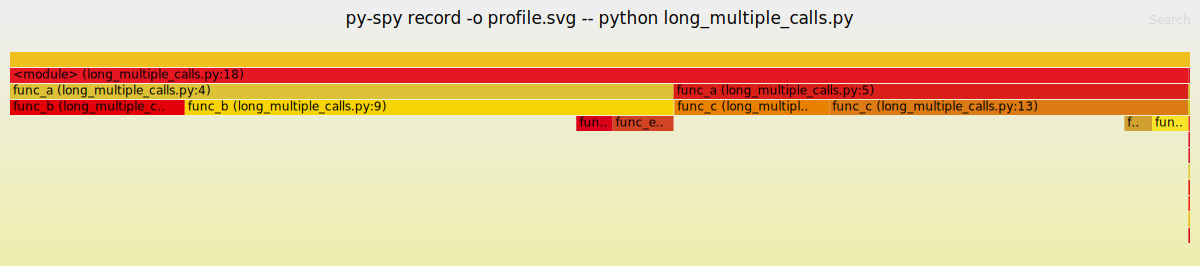

What we see on top is known as a flame graph. We can discuss a bit more on this flame graph.

The flame graph is a collection of stack traces and these traces are arranged as column of boxes, where each box represents a function or a stack frame.

The y-axis shows the depth and in this case, it is ordered from the top (root) to the bottom (leaf).

The x-axis spans the stack trace collection and the ordering is in alphabetical, and not by time.

The width of each function box shows the frequency at which that function was present in the stack traces. So in this example, it shows clearly that the bulk of the cummulative time was spent in calling function_b and function_c from function_a.

The background colors for each box are chosen purely for asthestic purposes and have no inherent meaning.

*source: https://cacm.acm.org/magazines/2016/6/202665-the-flame-graph/fulltext*

One of the useful commands is the Top command. Top shows a live view of what functions are taking the most time in your python program. Running py-spy with the top command gives you the following live statistical updates:


























Total Samples 10
GIL: 100.00%, Active: 100.00%, Threads: 1

  %Own   %Total  OwnTime  TotalTime  Function (filename)                        
 60.00%  70.00%   0.060s    0.070s   func_b (multiple_calls.py)
 10.00%  10.00%   0.010s    0.010s   func_c (multiple_calls.py)
 10.00%  20.00%   0.010s    0.020s   _call_with_frames_removed (<frozen importli
 10.00%  10.00%   0.010s    0.010s   func_e (multiple_calls.py)
 10.00%  10.00%   0.010s    0.010s   addpackage (site.py)
  0.00%  10.00%   0.000s    0.010s   _setoption (warnings.py)
  0.00%  20.00%   0.000s    0.020s   _load_unlocked (<frozen importlib._bootstra
  0.00%  20.00%   0.000s    0.020s   _find_and_load_unlocked (<frozen importlib.
  0.00%  10.00%   0.000s    0.010s   addsitedir (site.py)
  0.00%  20.00%   0.000s    0.020s   exec_module (<frozen importlib._bootstrap_e
  0.00%  10.00%   0.000s    0.010s   main (site.py)
  0.00%  10.00%   0.000s    0.010s   <module> (warnings.py)
  0.00%  10.00%   0.000s    

Let us compare this with cProfile to see if there is any delta between the two.

         132002004 function calls in 32.921 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1000   13.155    0.013   19.277    0.019 long_multiple_calls.py:7(func_b)
132000000   10.440    0.000   10.440    0.000 long_multiple_calls.py:15(func_e)
     1000    9.323    0.009   13.641    0.014 long_multiple_calls.py:11(func_c)
        1    0.003    0.003   32.921   32.921 long_multiple_calls.py:2(func_a)
        1    0.000    0.000   32.921   32.921 {built-in method builtins.exec}
        1    0.000    0.000   32.921   32.921 long_multiple_calls.py:2(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


